In [16]:
import pandas
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler, QuantileTransformer
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

In [17]:
raw_data = pandas.read_csv('creditcard_2023.csv')

raw_data.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


In [18]:
# drop ID column
raw_data.drop(columns=['id'],inplace=True)

In [19]:
# check for null values
raw_data.isna().sum()


V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [20]:
# look to see if data needs to be scaled 
min_max=raw_data.agg(['min', 'max'])
min_max.T


,min,max
V1,-3.495584,2.229046
V2,-49.966572,4.361865
V3,-3.183760,14.125834
V4,-4.951222,3.201536
V5,-9.952786,42.716891
V6,-21.111108,26.168402
V7,-4.351839,217.873038
V8,-10.756342,5.958040
V9,-3.751919,20.270062
V10,-3.163276,31.722709


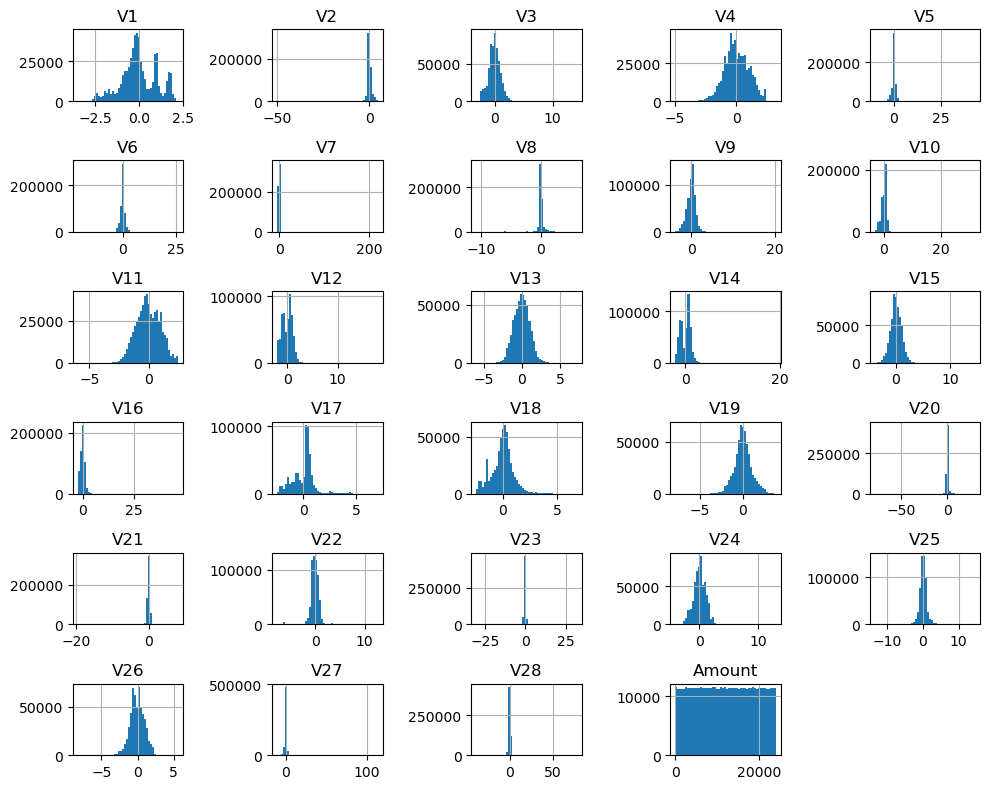

In [21]:
features = raw_data.drop(columns=['Class'])
target = raw_data['Class']

features.hist(figsize=(10, 8),bins=50)
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.savefig('Feature Histogram.png')
plt.show()


In [22]:
features.corr() #.to_csv('feature_corr.csv')


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
V1,1.000000,-0.561184,0.484499,-0.498963,0.517462,0.354728,0.573381,-0.226757,0.548973,0.599108,...,-0.219164,-0.034669,-0.073729,-0.068917,-0.014651,-0.008508,0.009281,-0.122772,0.070111,-0.001280
V2,-0.561184,1.000000,-0.627810,0.579638,-0.631669,-0.341040,-0.694022,0.191321,-0.585095,-0.621798,...,0.263707,-0.013570,0.035346,0.151906,-0.027515,0.132443,0.012219,0.053835,0.021071,-0.000076
V3,0.484499,-0.627810,1.000000,-0.687726,0.510351,0.508974,0.634336,-0.263018,0.648615,0.707676,...,-0.253805,-0.021710,-0.041970,-0.058884,0.076460,-0.076332,-0.052056,-0.190582,0.005346,-0.002001
V4,-0.498963,0.579638,-0.687726,1.000000,-0.429243,-0.474403,-0.588648,0.199013,-0.676648,-0.712839,...,0.257236,-0.013093,0.091197,0.043266,-0.102508,0.029402,0.136679,0.188036,-0.011316,0.001859
V5,0.517462,-0.631669,0.510351,-0.429243,1.000000,0.245187,0.586828,-0.314975,0.479614,0.563874,...,-0.246694,0.034147,-0.119152,-0.113919,-0.083243,-0.047845,0.047771,-0.043759,0.108422,-0.000016
V6,0.354728,-0.341040,0.508974,-0.474403,0.245187,1.000000,0.418703,-0.604491,0.432241,0.471000,...,-0.188360,-0.040153,0.036896,0.308598,-0.005237,-0.195340,-0.067605,-0.260783,-0.065641,0.000734
V7,0.573381,-0.694022,0.634336,-0.588648,0.586828,0.418703,1.000000,-0.180986,0.601789,0.678004,...,-0.299436,0.019627,-0.104043,-0.111177,-0.004152,0.000802,-0.006488,-0.036557,0.040732,0.001326
V8,-0.226757,0.191321,-0.263018,0.199013,-0.314975,-0.604491,-0.180986,1.000000,-0.208557,-0.199995,...,0.131354,0.056416,-0.098752,-0.463649,0.083272,0.322639,0.040448,0.298398,0.046017,-0.000208
V9,0.548973,-0.585095,0.648615,-0.676648,0.479614,0.432241,0.601789,-0.208557,1.000000,0.748487,...,-0.328975,0.131001,-0.204723,-0.042371,0.044006,-0.034885,-0.131000,-0.111842,0.069959,-0.001589
V10,0.599108,-0.621798,0.707676,-0.712839,0.563874,0.471000,0.678004,-0.199995,0.748487,1.000000,...,-0.287051,0.037426,-0.150957,-0.056285,0.045935,-0.014045,-0.053684,-0.134907,0.035646,-0.001259


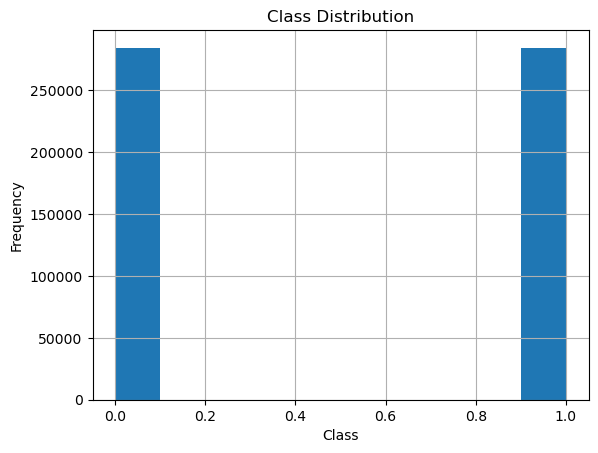

In [32]:
target.hist()
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Class Distribution')
plt.savefig('Class Distribution.png')
plt.show()

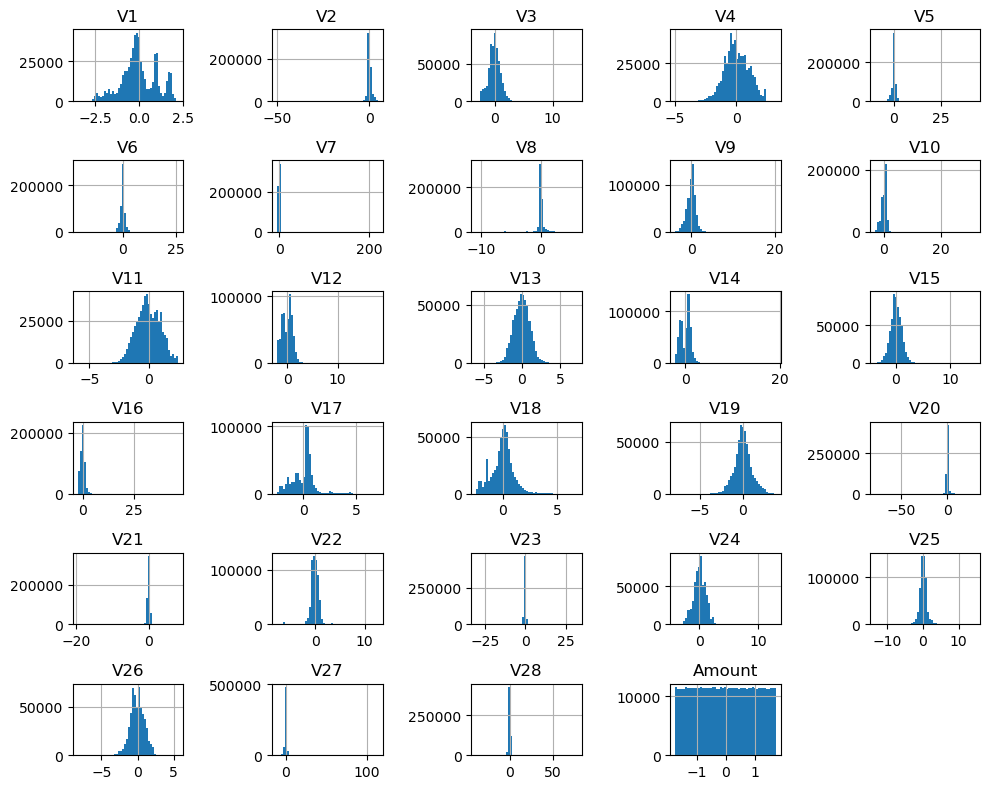

In [24]:
scaler = StandardScaler()
scaledfeatures = scaler.fit_transform(features)

scaledfeatures = pandas.DataFrame(scaledfeatures,columns=features.columns.to_list())

scaledfeatures.hist(figsize=(10, 8),bins=50)
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.savefig('Scaled Histograms.png')
plt.show()

In [25]:
# split data into training and test 
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.33, random_state=42)

normalizefeature = ['V2', 'V3', 'V5', 'V7', 'V9', 'V10', 'V12', 'V14', 'V16', 'V20', 'V21', 'V27']
scalefeatures = ['V1', 'V4', 'V6', 'V8', 'V11', 'V13', 'V15', 'V17', 'V18', 'V19', 'V22', 'V23', 'V24', 'V25', 'V26', 'V28']

scaler = StandardScaler()
qt = QuantileTransformer(n_quantiles=10000, random_state=250)
preprocessor = ColumnTransformer(transformers=[('scaler', scaler, scalefeatures),('qt', qt, normalizefeature)],remainder='passthrough')

X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)


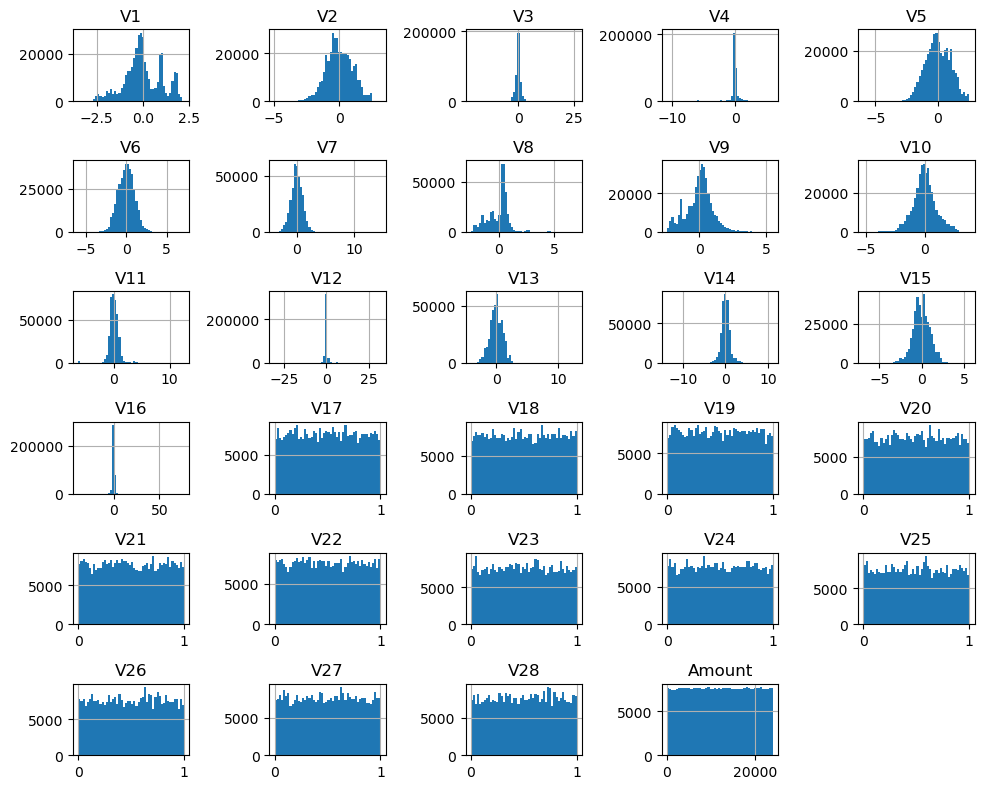

In [26]:
scaledfeatures = pandas.DataFrame(X_train,columns=features.columns.to_list())

scaledfeatures.hist(figsize=(10, 8),bins=50)
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.savefig('Scaled Histograms.png')
plt.show()

In [27]:
pca = PCA(n_components=8)

X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)



In [28]:
%%time

dectree = DecisionTreeClassifier()
dectree = dectree.fit(X_train, y_train)

dectreepred = dectree.predict(X_test)

accuracy = accuracy_score(y_test, dectreepred)
precision = precision_score(y_test, dectreepred,average='weighted')
recall = recall_score(y_test, dectreepred,average='weighted')
f1 = f1_score(y_test, dectreepred,average='weighted')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")

Accuracy: 0.9908339017735335
Precision: 0.9908474839667275
Recall: 0.9908339017735335
F1-score: 0.9908338256446246
CPU times: total: 8.16 s
Wall time: 8.02 s


In [29]:
%%time

rdforest = RandomForestClassifier()
rdforest = rdforest.fit(X_train, y_train)

rdforestpred = rdforest.predict(X_test)

accuracy = accuracy_score(y_test, rdforestpred)
precision = precision_score(y_test, rdforestpred,average='weighted')
recall = recall_score(y_test, rdforestpred,average='weighted')
f1 = f1_score(y_test, rdforestpred,average='weighted')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")

Accuracy: 0.9981401347203275
Precision: 0.9981402592365759
Recall: 0.9981401347203275
F1-score: 0.998140134360363
CPU times: total: 2min 3s
Wall time: 2min 6s


In [30]:
%%time

knn = KNeighborsClassifier()
knn = knn.fit(X_train, y_train)

knnpred = knn.predict(X_test)

accuracy = accuracy_score(y_test, knnpred)
precision = precision_score(y_test, knnpred,average='weighted')
recall = recall_score(y_test, knnpred,average='weighted')
f1 = f1_score(y_test, knnpred,average='weighted')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")

Accuracy: 0.9023970412687585
Precision: 0.9100405308724446
Recall: 0.9023970412687585
F1-score: 0.9019439415359997
CPU times: total: 8.08 s
Wall time: 8.23 s
